In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [37]:
date_list = [(2012, m, d) for m in range(12, 13) for d in range(1, 32)] + [(2013, m, d) for m in range(1, 3) for d in range(1, 32)]

In [38]:
basic_statistics_uids = dict({})
basic_statistics_recs = dict({})

for y, m, d in date_list:
    filename = '/data/fan/data/UsersInOsaka_2012/{:04d}{:02d}{:02d}.csv'.format(y, m, d)
    if not os.path.isfile(filename):
        continue
    print(filename)
    df = pd.read_csv(filename, header=None)
    basic_statistics_uids[(y, m, d)] = len(df[0].unique())
    basic_statistics_recs[(y, m, d)] = len(df)

/data/fan/data/UsersInOsaka_2012/20121201.csv
/data/fan/data/UsersInOsaka_2012/20121202.csv
/data/fan/data/UsersInOsaka_2012/20121203.csv
/data/fan/data/UsersInOsaka_2012/20121204.csv
/data/fan/data/UsersInOsaka_2012/20121205.csv
/data/fan/data/UsersInOsaka_2012/20121206.csv
/data/fan/data/UsersInOsaka_2012/20121207.csv
/data/fan/data/UsersInOsaka_2012/20121208.csv
/data/fan/data/UsersInOsaka_2012/20121209.csv
/data/fan/data/UsersInOsaka_2012/20121210.csv
/data/fan/data/UsersInOsaka_2012/20121211.csv
/data/fan/data/UsersInOsaka_2012/20121212.csv
/data/fan/data/UsersInOsaka_2012/20121213.csv
/data/fan/data/UsersInOsaka_2012/20121214.csv
/data/fan/data/UsersInOsaka_2012/20121215.csv
/data/fan/data/UsersInOsaka_2012/20121216.csv
/data/fan/data/UsersInOsaka_2012/20121217.csv
/data/fan/data/UsersInOsaka_2012/20121218.csv
/data/fan/data/UsersInOsaka_2012/20121219.csv
/data/fan/data/UsersInOsaka_2012/20121220.csv
/data/fan/data/UsersInOsaka_2012/20121221.csv
/data/fan/data/UsersInOsaka_2012/2

In [39]:
recs_dict = dict({})
for y, m, d in basic_statistics_recs:
    recs_dict['{:04d}-{:02d}-{:02d}'.format(y, m, d)] = basic_statistics_recs[(y, m, d)]

uids_dict = dict({})
for y, m, d in basic_statistics_uids:
    uids_dict['{:04d}-{:02d}-{:02d}'.format(y, m, d)] = basic_statistics_uids[(y, m, d)]

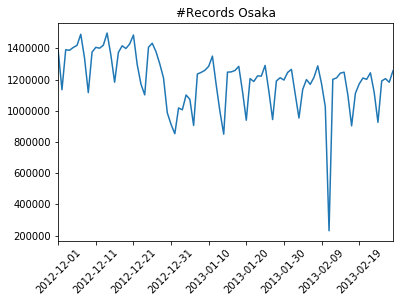

In [40]:
pd.Series(recs_dict).plot(rot=45, title='#Records Osaka')

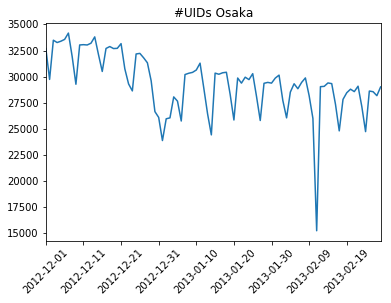

In [41]:
pd.Series(uids_dict).plot(rot=45, title='#UIDs Osaka')

In [1]:
import pickle as pk

In [12]:
import pandas as pd

In [22]:
doc_user_set = set([])

for d in range(1, 32):
    filename = '/data/fan/UsersInTokyoProcessed/201210{:02d}_interp.pk'.format(d)
    with open(filename, 'rb') as f:
        doc_user_set = doc_user_set | set(list(pk.load(f).keys()))

In [23]:
len(doc_user_set)

204390

In [24]:
new_user_rate = dict({})
for d in range(1, 31):
    filename = '/data/fan/UsersInTokyoProcessed/201211{:02d}_interp.pk'.format(d)
    print(filename)
    with open(filename, 'rb') as f:
        data = pk.load(f)
    new_user_cnt = len(set(list(data.keys())) - doc_user_set)
    new_user_rate['2012-11-{:02d}'.format(d)] = new_user_cnt / len(data)
    doc_user_set = doc_user_set | set(list(data.keys()))

/data/fan/UsersInTokyoProcessed/20121101_interp.pk
/data/fan/UsersInTokyoProcessed/20121102_interp.pk
/data/fan/UsersInTokyoProcessed/20121103_interp.pk
/data/fan/UsersInTokyoProcessed/20121104_interp.pk
/data/fan/UsersInTokyoProcessed/20121105_interp.pk
/data/fan/UsersInTokyoProcessed/20121106_interp.pk
/data/fan/UsersInTokyoProcessed/20121107_interp.pk
/data/fan/UsersInTokyoProcessed/20121108_interp.pk
/data/fan/UsersInTokyoProcessed/20121109_interp.pk
/data/fan/UsersInTokyoProcessed/20121110_interp.pk
/data/fan/UsersInTokyoProcessed/20121111_interp.pk
/data/fan/UsersInTokyoProcessed/20121112_interp.pk
/data/fan/UsersInTokyoProcessed/20121113_interp.pk
/data/fan/UsersInTokyoProcessed/20121114_interp.pk
/data/fan/UsersInTokyoProcessed/20121115_interp.pk
/data/fan/UsersInTokyoProcessed/20121116_interp.pk
/data/fan/UsersInTokyoProcessed/20121117_interp.pk
/data/fan/UsersInTokyoProcessed/20121118_interp.pk
/data/fan/UsersInTokyoProcessed/20121119_interp.pk
/data/fan/UsersInTokyoProcessed

In [14]:
%matplotlib inline

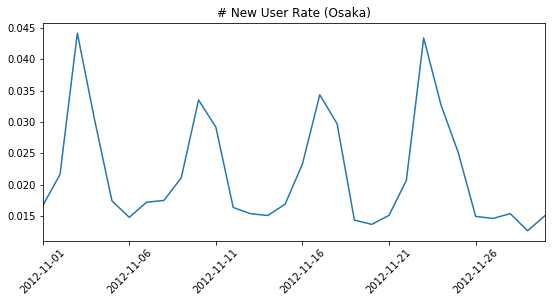

In [21]:
pd.Series(new_user_rate).plot(rot=45, title='# New User Rate (Osaka)', figsize=(9, 4))

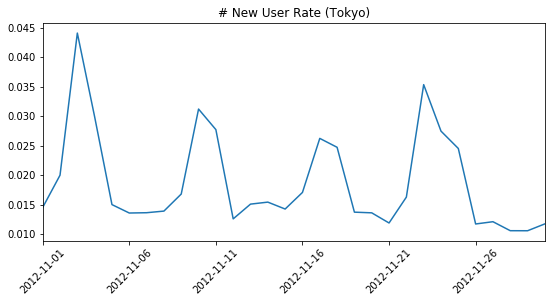

In [25]:
pd.Series(new_user_rate).plot(rot=45, title='# New User Rate (Tokyo)', figsize=(9, 4))